# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mont-dore
Processing Record 2 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 3 of Set 1 | enewetak
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | lihue
Processing Record 6 of Set 1 | aykhal
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | mwene-ditu
Processing Record 11 of Set 1 | vylkove
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | papatowai
Processing Record 14 of Set 1 | badger
Processing Record 15 of Set 1 | la passe
Processing Record 16 of Set 1 | kirensk
Processing Record 17 of Set 1 | tura
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | port lincoln
Processing Record 20 of Set 1 | ves'yegonsk
Processing Record 21 of Set 1 | san luis de since
Processing Record 22 of Set

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mont-dore,-22.2833,166.5833,27.78,99,50,4.15,NC,1714533205
1,enewetak,11.3474,162.3373,27.59,75,34,8.60,MH,1714533205
2,port-aux-francais,-49.3500,70.2167,3.40,98,100,19.88,TF,1714533205
3,lihue,21.9789,-159.3672,26.58,73,0,3.60,US,1714533205
4,aykhal,66.0000,111.5000,-5.97,74,2,4.83,RU,1714533205


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mont-dore,-22.2833,166.5833,27.78,99,50,4.15,NC,1714533205
1,enewetak,11.3474,162.3373,27.59,75,34,8.60,MH,1714533205
2,port-aux-francais,-49.3500,70.2167,3.40,98,100,19.88,TF,1714533205
3,lihue,21.9789,-159.3672,26.58,73,0,3.60,US,1714533205
4,aykhal,66.0000,111.5000,-5.97,74,2,4.83,RU,1714533205


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

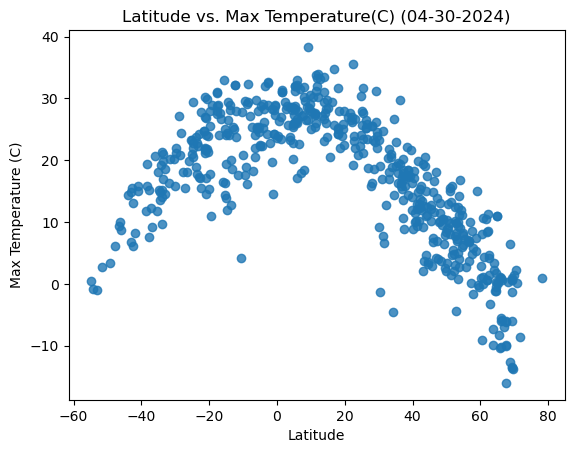

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8)

# Incorporate the other graph properties
date = datetime.now().strftime("%m-%d-%Y")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"Latitude vs. Max Temperature(C) ({date})")

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

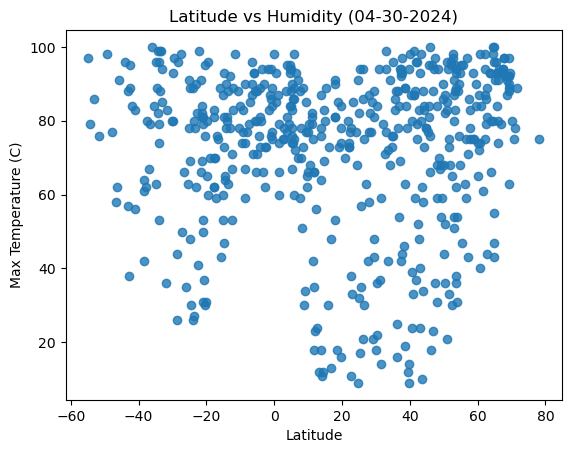

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8)

# Incorporate the other graph properties
date = datetime.now().strftime("%m-%d-%Y")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"Latitude vs Humidity ({date})")

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

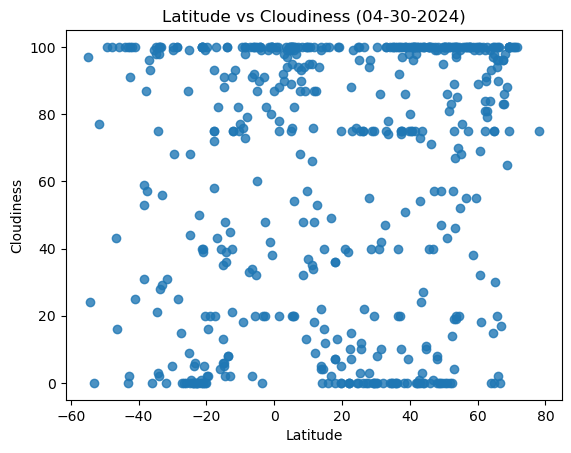

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8)

# Incorporate the other graph properties
date = datetime.now().strftime("%m-%d-%Y")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Latitude vs Cloudiness ({date})")

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

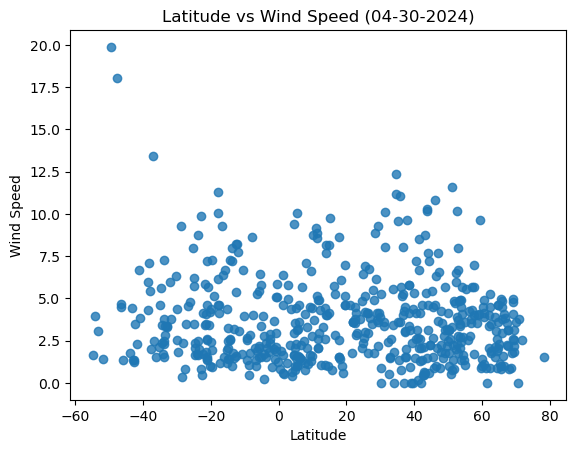

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8)

# Incorporate the other graph properties
date = datetime.now().strftime("%m-%d-%Y")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Latitude vs Wind Speed ({date})")

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, annot_pos,):
        # Calculate the linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression values
    regress_values = [slope * x + intercept for x in x_values]
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create Plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, annot_pos, fontsize=15, color="red")
    
    # Label plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Print r and r-squared value
    print(f"The correlation coefficient is: {rvalue}")
    print(f"The r-squared is: {rvalue**2}")
    
    # Show plot
    plt.show()


In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) >= 0, :]

# Display sample data
northern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,enewetak,11.3474,162.3373,27.59,75,34,8.60,MH,1714533205
3,lihue,21.9789,-159.3672,26.58,73,0,3.60,US,1714533205
4,aykhal,66.0000,111.5000,-5.97,74,2,4.83,RU,1714533205
6,bilibino,68.0546,166.4372,0.29,92,98,0.81,RU,1714533205
9,vylkove,45.4021,29.5860,12.74,77,100,5.43,UA,1714533206


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mont-dore,-22.2833,166.5833,27.78,99,50,4.15,NC,1714533205
2,port-aux-francais,-49.3500,70.2167,3.40,98,100,19.88,TF,1714533205
5,west island,-12.1568,96.8225,27.99,89,75,8.23,CC,1714533205
7,grytviken,-54.2811,-36.5092,-0.84,79,24,3.94,GS,1714533206
8,mwene-ditu,-7.0000,23.4500,18.21,85,100,2.07,CD,1714533206


###  Temperature vs. Latitude Linear Regression Plot

The correlation coefficient is: -0.8876758923426517
The r-squared is: 0.7879684898463228


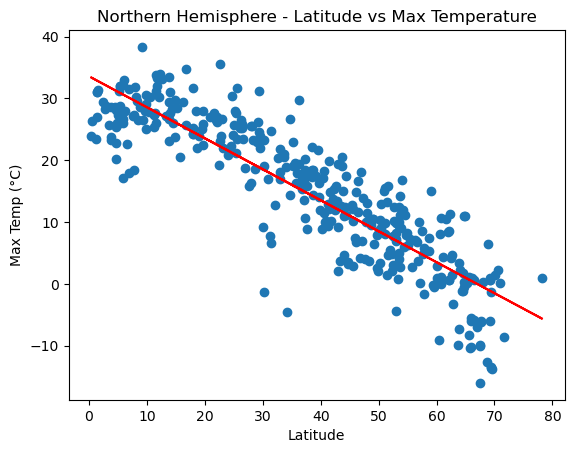

In [37]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    northern_hemisphere['Lat'], 
    northern_hemisphere['Max Temp'], 
    'Latitude', 
    'Max Temp (°C)', 
    'Northern Hemisphere - Latitude vs Max Temperature', 
    (10, -20)
)

The correlation coefficient is: 0.7018046019740389
The r-squared is: 0.4925296993519392


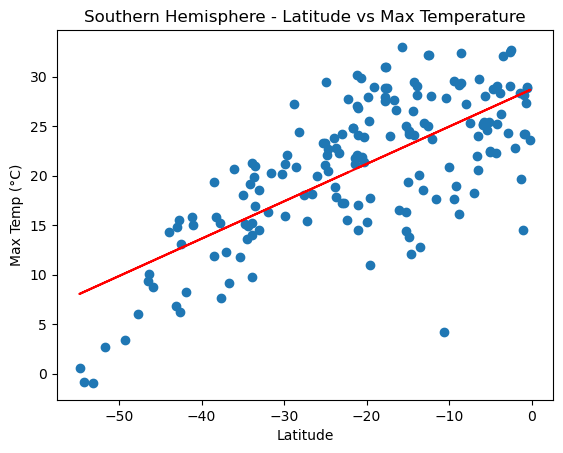

In [38]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemisphere['Lat'], 
    southern_hemisphere['Max Temp'], 
    'Latitude', 
    'Max Temp (°C)', 
    'Southern Hemisphere - Latitude vs Max Temperature', 
    (10, -20)
)

The Northern Hemisphere exhibits a strong relationship between the lattitude and maximum temperatures, while the Southern Hemisphere exhibits a weaker relationship. This could be due to the Nothern Hemisphere appearing to have a larger range of values for both x-and-y axes. The Nothern Hemisphere showcases a negative linear relationshup, while the Southern Hemisphere showcases a positive linear relationship.

### Humidity vs. Latitude Linear Regression Plot

The correlation coefficient is: 0.16924464225183042
The r-squared is: 0.028643748930950064


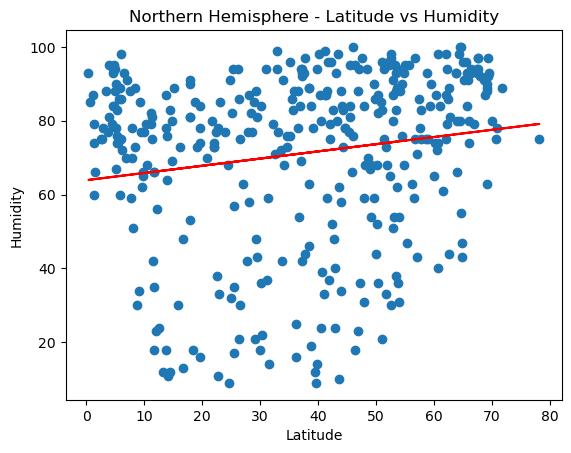

In [39]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemisphere['Lat'], 
    northern_hemisphere['Humidity'], 
    'Latitude', 
    'Humidity', 
    'Northern Hemisphere - Latitude vs Humidity', 
    (10, -20)
)

The correlation coefficient is: 0.0668309915570053
The r-squared is: 0.004466381432492513


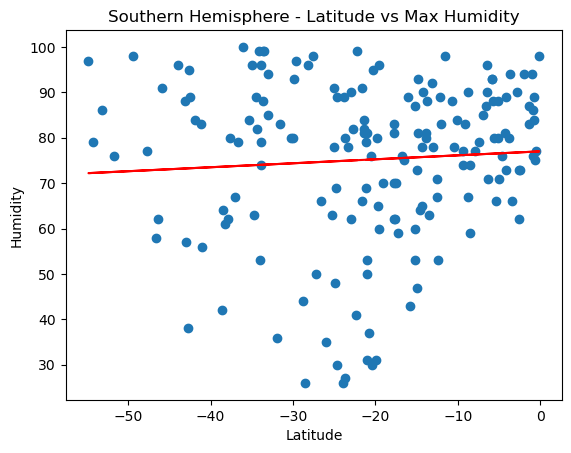

In [40]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemisphere['Lat'], 
    southern_hemisphere['Humidity'], 
    'Latitude', 
    'Humidity', 
    'Southern Hemisphere - Latitude vs Max Humidity', 
    (10, -20)
)

There is a non-significant relationship between humidity and latittude between either hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The correlation coefficient is: 0.11216958829682246
The r-squared is: 0.01258201653867865


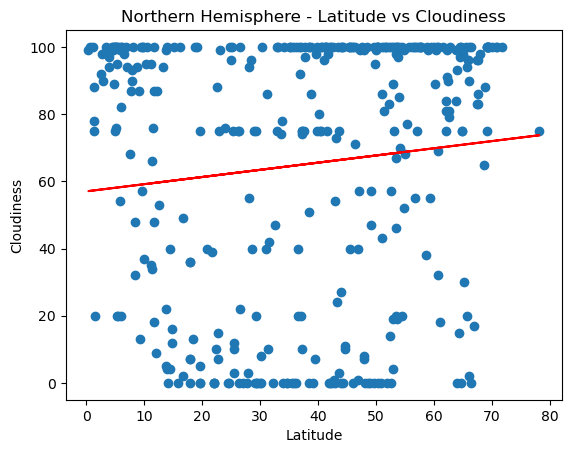

In [41]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemisphere['Lat'], 
    northern_hemisphere['Cloudiness'], 
    'Latitude', 
    'Cloudiness', 
    'Northern Hemisphere - Latitude vs Cloudiness', 
    (10, -20)
)

The correlation coefficient is: 0.09466054052228365
The r-squared is: 0.008960617931970904


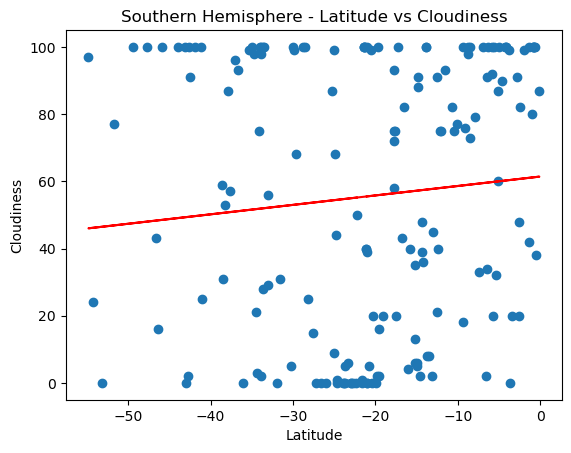

In [42]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemisphere['Lat'], 
    southern_hemisphere['Cloudiness'], 
    'Latitude', 
    'Cloudiness', 
    'Southern Hemisphere - Latitude vs Cloudiness', 
    (10, -20)
)

There is a non-significant relationship between cloudiness and latittude between either hemisphere. Both hemispheres exhibit positive linear relationships.

### Wind Speed vs. Latitude Linear Regression Plot

The correlation coefficient is: -0.06273108394599296
The r-squared is: 0.0039351888930392155


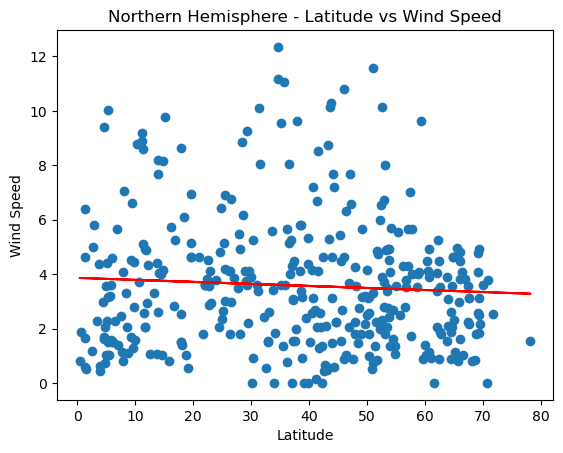

In [43]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemisphere['Lat'], 
    northern_hemisphere['Wind Speed'], 
    'Latitude', 
    'Wind Speed', 
    'Northern Hemisphere - Latitude vs Wind Speed', 
    (10, -20)
)

The correlation coefficient is: -0.17987434778579117
The r-squared is: 0.032354780991363755


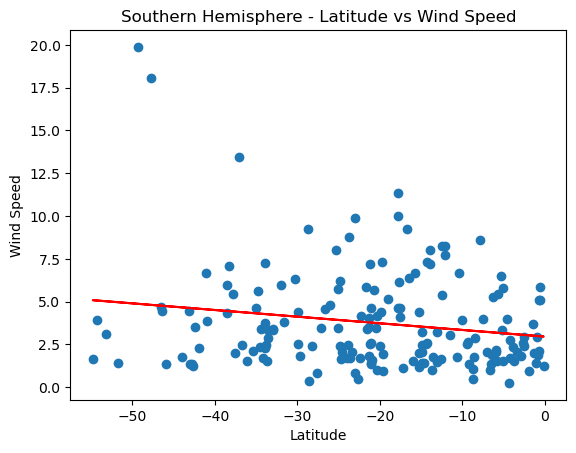

In [44]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemisphere['Lat'], 
    southern_hemisphere['Wind Speed'], 
    'Latitude', 
    'Wind Speed', 
    'Southern Hemisphere - Latitude vs Wind Speed', 
    (10, -20)
)

There is a non-significant relationship between wind speed and latittude between either hemisphere. Both hemispheres exhibit negative linear relationships.